In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
from scipy.stats import chisquare


In [2]:
def roulette(rangos):
    random_num = np.random.uniform(0, rangos[-1]) 
    for index, value in enumerate(rangos):
        if random_num <= value:
            return index

In [28]:
productos = pd.read_csv('info_productos.csv')
compras = pd.read_excel('informacion_compra.xlsx')
transportes = pd.read_excel('Unidades_transporte.xlsx')
transportes.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
factura_frequencies = compras.groupby(['Factura']).size().reset_index(name='Frequency')
df = factura_frequencies.Frequency.value_counts()
df = pd.DataFrame(df)
df = df.reset_index()
df.columns = ['Pedidos', 'Frecuencia']

In [30]:
df['Pedidos'] = df['Pedidos']-1
df

,Pedidos,Frecuencia
0,0,20526
1,1,2938
2,2,800
3,3,275
4,4,117
5,5,62
6,6,29
7,7,19
8,8,11
9,9,8


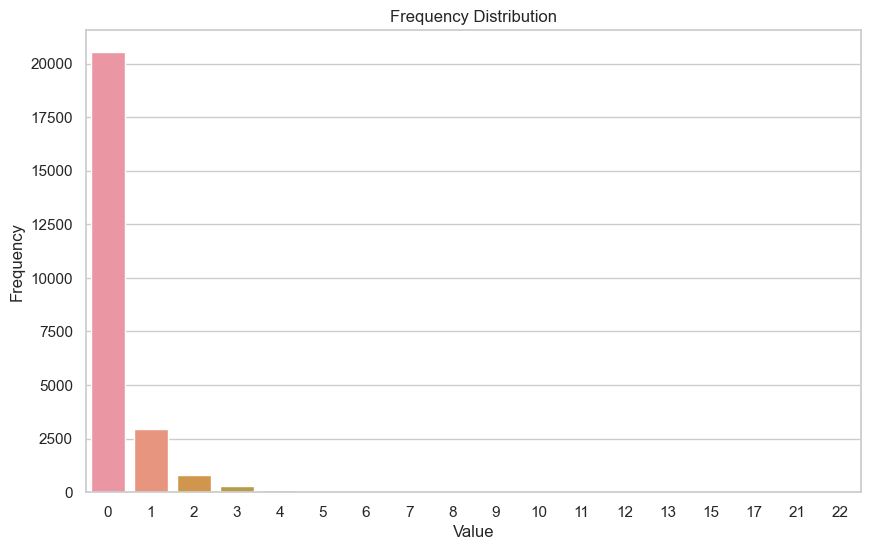

In [31]:
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))  # Optional: adjust figure size
sns.barplot(x=df['Pedidos'], y=df['Frecuencia'])

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

# Show the plot
plt.show()

In [33]:
df

,Pedidos,Frecuencia
0,0,20526
1,1,2938
2,2,800
3,3,275
4,4,117
5,5,62
6,6,29
7,7,19
8,8,11
9,9,8


In [35]:
# Calcular el valor medio de los datos observados
valor_medio = np.sum(df['Pedidos'] * df['Frecuencia']) / np.sum(df['Frecuencia'])-1
# Calcular los valores esperados bajo la distribución Poisson
valores_esperados = poisson.pmf(df['Pedidos'], valor_medio) * np.sum(df['Frecuencia'])
# Obtén las frecuencias observadas y esperadas como arrays
frecuencias_observadas = df['Frecuencia'].to_numpy()
frecuencias_esperadas = valores_esperados

# Realiza la prueba Chi-cuadrado
chi_square_statistic, p_value = chisquare(frecuencias_observadas, f_exp=frecuencias_esperadas)

print("Chi-cuadrado estadístico:", chi_square_statistic)
print("Valor p:", p_value)

alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Rechazar la hipótesis nula: La distribución no se ajusta a la Poisson.")
else:
    print("No se puede rechazar la hipótesis nula: La distribución se ajusta a la Poisson.")


Chi-cuadrado estadístico: nan
Valor p: nan
No se puede rechazar la hipótesis nula: La distribución se ajusta a la Poisson.


In [34]:
result = (df['Frecuencia'] * df['Pedidos']).sum()
total = df['Frecuencia'].sum()
lamda = result/total
poisson_dist = poisson(mu=lamda-1)

# Calculate the probability mass function (PMF) for each frequency
df['Poisson'] = poisson_dist.pmf(df['Frecuencia relativa'])
df['Frecuencia Esperada'] = total*df['Poisson']

#df['Poisson_Cumulative'] = df['Poisson'].cumsum()
observed_frequencies = df['Frecuencia relativa']
expected_frequencies = df['Frecuencia Esperada']


chi2, p = chisquare(observed_frequencies, expected_frequencies)

print("Chi-cuadrado:", chi2)
print("P-valor:", p)
# Display the DataFrame
print(df)

KeyError: 'Frecuencia relativa'

In [ ]:
df

,Pedidos,Frequency,Poisson,Frecuencia Esperada
0,1,20526,0.000000e+00,0.000000e+00
1,2,2938,0.000000e+00,0.000000e+00
2,3,800,0.000000e+00,0.000000e+00
3,4,275,0.000000e+00,0.000000e+00
4,5,117,5.274205e-259,1.308161e-254
5,6,62,4.381577e-121,1.086762e-116
6,7,29,4.832141e-48,1.198516e-43
7,8,19,1.409169e-28,3.495162e-24
8,9,11,1.304985e-14,3.236754e-10
9,10,8,6.198041e-10,1.537300e-05


In [ ]:
numpy_array = df.values

In [ ]:
numpy_array

array([[1.00000000e+000, 2.05260000e+004, 0.00000000e+000,
        0.00000000e+000],
       [2.00000000e+000, 2.93800000e+003, 0.00000000e+000,
        0.00000000e+000],
       [3.00000000e+000, 8.00000000e+002, 0.00000000e+000,
        0.00000000e+000],
       [4.00000000e+000, 2.75000000e+002, 0.00000000e+000,
        0.00000000e+000],
       [5.00000000e+000, 1.17000000e+002, 5.27420542e-259,
        1.30816117e-254],
       [6.00000000e+000, 6.20000000e+001, 4.38157664e-121,
        1.08676245e-116],
       [7.00000000e+000, 2.90000000e+001, 4.83214139e-048,
        1.19851603e-043],
       [8.00000000e+000, 1.90000000e+001, 1.40916915e-028,
        3.49516224e-024],
       [9.00000000e+000, 1.10000000e+001, 1.30498483e-014,
        3.23675388e-010],
       [1.00000000e+001, 8.00000000e+000, 6.19804102e-010,
        1.53730012e-005],
       [1.10000000e+001, 5.00000000e+000, 9.99096671e-006,
        2.47805947e-001],
       [1.20000000e+001, 4.00000000e+000, 1.81516223e-004,
      

In [ ]:
poisson_dist = poisson(mu=lamda)

df['poisson_pmf'] = poisson_dist.pmf(df['Frequency'])

In [ ]:
df

,Pedidos,Frequency,Poisson,Frecuencia Esperada,poisson_pmf
0,1,20526,0.000000e+00,0.000000e+00,0.000000e+00
1,2,2938,0.000000e+00,0.000000e+00,0.000000e+00
2,3,800,0.000000e+00,0.000000e+00,0.000000e+00
3,4,275,0.000000e+00,0.000000e+00,0.000000e+00
4,5,117,5.274205e-259,1.308161e-254,5.274205e-259
5,6,62,4.381577e-121,1.086762e-116,4.381577e-121
6,7,29,4.832141e-48,1.198516e-43,4.832141e-48
7,8,19,1.409169e-28,3.495162e-24,1.409169e-28
8,9,11,1.304985e-14,3.236754e-10,1.304985e-14
9,10,8,6.198041e-10,1.537300e-05,6.198041e-10


In [ ]:
df = compras
factura_frequencies = df.groupby(['Factura']).size().reset_index(name='Frequency')
factura_totals = df['Factura'].value_counts().reset_index()
factura_totals.columns = ['Factura', 'Total']
factura_frequencies = factura_frequencies.merge(factura_totals, on='Factura')
total_deliveries = factura_frequencies['Frequency'].sum()
factura_frequencies['Probability'] = factura_frequencies['Frequency'] / total_deliveries
facturas_distribution = factura_frequencies[['Factura','Probability']]
print(facturas_distribution)

       Factura  Probability
0          379     0.000032
1          475     0.000032
2          643     0.000032
3          840     0.000032
4          918     0.000032
...        ...          ...
24798   962767     0.000032
24799   966478     0.000032
24800   977019     0.000095
24801   984050     0.000032
24802   997165     0.000032

[24803 rows x 2 columns]


In [ ]:
random_number = np.random.random()
np.searchsorted(cumulative_probs, random_number)

NameError: name 'cumulative_probs' is not defined

In [35]:
probabilities = [deliveries_distribution['Probability']]
cumulative_probs = np.cumsum(probabilities)
random_number = np.random.random()
selected_index = np.searchsorted(cumulative_probs, random_number)
selected_item = compras[selected_index]

print("Random number:", random_number)
print("Selected index:", selected_index)
print("Selected item:", selected_item)

NameError: name 'deliveries_distribution' is not defined

In [36]:
productos

,Producto,Volumen mtro3
0,1,0.001050
1,2,0.026710
2,3,0.020000
3,4,0.056515
4,5,0.025238
...,...,...
53627,53628,0.000266
53628,53629,0.000560
53629,53630,0.000540
53630,53631,0.000069
